# Quadrature Rules

In this example, we will explore how to access quadrature rules and find some importatant information about them.

In [1]:
using SummationByParts
using SummationByParts.Cubature, SummationByParts.SymCubatures

[ Info: Precompiling SummationByParts [55d25451-638a-4804-8089-59924bcb4a40]
[ Info: Skipping precompilation since __precompile__(false). Importing SummationByParts [55d25451-638a-4804-8089-59924bcb4a40].


WebIO._IJuliaInit()

## Finding quadratrue rules on the reference triangle

In [2]:
T=Float64

Float64

In [3]:
q = 5 # quadrature degree

5

In [4]:
lgl = true; # select LGL type facet quadrature
lg = true; # select LG type facet quadrature

Now, we can find different types of cubature rules by specifying there type. E.g., SBP diagonal E operators on a triangle with the LGL facet quadrature can be accessed as:

In [5]:
cub_lgl,vtx = getTriCubatureDiagE(q, T, vertices=lgl)
# cub_lgl,vtx = getTriCubatureOmega(q, T)
# cub_lgl,vtx = getTriCubatureGamma(q, T)

(TriSymCub{Float64}(2, 4, 15, true, true, false, 1, 1, 0, [0, 3, 1], [0.41469035132718185, 0.8273268353539885], [0.014698618394803228, 0.09752600361864236, 0.44155411568082115, 0.056443964486199594]), [-1.0 -1.0; 1.0 -1.0; -1.0 1.0])

Similarly, the LG type SBP diagonal E operator is computed as: 

In [6]:
cub_lg,_ = getTriCubatureDiagE(q, T, vertices=lg)

(TriSymCub{Float64}(2, 4, 15, true, true, false, 1, 1, 0, [0, 3, 1], [0.41469035132718185, 0.8273268353539885], [0.014698618394803228, 0.09752600361864236, 0.44155411568082115, 0.056443964486199594]), [-1.0 -1.0; 1.0 -1.0; -1.0 1.0])

Information about the quadrature rules can be obtained as follows. 

In [7]:
cub_lgl.numnodes # the number of nodes

15

In [8]:
cub_lgl.numparams # the number of parameters 

2

In [9]:
cub_lgl.numweights # the number of weights

4

In [10]:
cub_lgl.vertices # check if vertices are included

true

In [11]:
cub_lgl.params # the vector of parameter vectors (in Barycentric coordinates)

2-element Vector{Float64}:
 0.41469035132718185
 0.8273268353539885

In [12]:
cub_lgl.weights # the weight vector (one weight value per each symmetry group)

4-element Vector{Float64}:
 0.014698618394803228
 0.09752600361864236
 0.44155411568082115
 0.056443964486199594

## Finding quadrature rules in Cartesian coordinates

The nodal locations can be found as follows:

In [13]:
xy = SymCubatures.calcnodes(cub_lgl, vtx);
println("x = ", xy[1,:],"\n")
println("y = ", xy[2,:])

x = [-1.0, 1.0, -1.0, 0.0, 0.0, -1.0, -0.5853096486728182, -0.5853096486728182, 0.17061929734563638, -0.6546536707079771, 0.6546536707079771, 0.6546536707079771, -0.6546536707079771, -1.0, -1.0]

y = [-1.0, -1.0, 1.0, -1.0, 0.0, 0.0, 0.17061929734563636, -0.5853096486728182, -0.5853096486728182, -1.0, -1.0, -0.6546536707079771, 0.6546536707079771, 0.6546536707079771, -0.6546536707079771]


The weights are computed as: 

In [14]:
w = SymCubatures.calcweights(cub_lgl);
println("w = ", w)

w = [0.014698618394803228, 0.014698618394803228, 0.014698618394803228, 0.09752600361864236, 0.09752600361864236, 0.09752600361864236, 0.44155411568082115, 0.44155411568082115, 0.44155411568082115, 0.056443964486199594, 0.056443964486199594, 0.056443964486199594, 0.056443964486199594, 0.056443964486199594, 0.056443964486199594]


The LGL facet nodes (on the reference line) are obtained as:

In [15]:
cub_facet,vtx_facet = SummationByParts.Cubature.quadrature(q, internal=false);
xf = SymCubatures.calcnodes(cub_facet, vtx_facet);
println("xf = ", xf[1,:])

xf = [-1.0, 1.0, -0.44721359549995787, 0.44721359549995787]


## Computing important information about the quadrature rules

The minimum distance between the quadrature points can be computed as: 

In [16]:
mindist = calcminnodedistance(cub_lgl, vtx)

0.3453463292920229

The quadrature truncation error is computed as (using the Proriol-Koornwinder-Dubiner (PKD) basis functions):

In [17]:
quad_err = quadTruncErr(cub_lgl, q)

1.1390781799841092

Check if all the interior quadrature rules are inside the domain and do not lie on the boundaries:

In [18]:
checkInteriorNodeLocaton(cub_lgl)

Success: All interior nodes are in the interior of the domain.


# Ploting the quadrature points

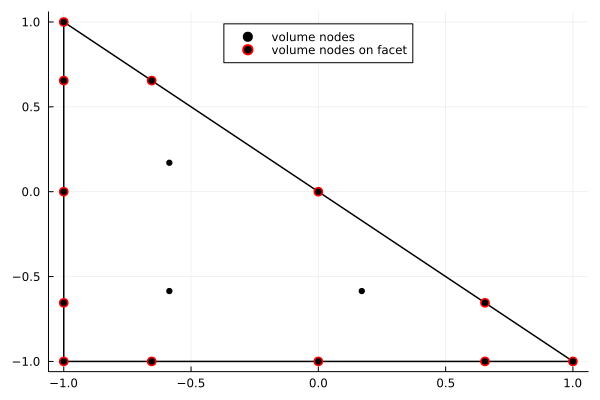

In [19]:
plot_tri_nodes(x=xy)

## Quadrature on the reference tetrahedron

The same procedure can be repeated to access the quadrature rules on the reference tetrahedron

In [20]:
cub_tet,vtx_tet = getTetCubatureDiagE(q, T)
# cub_tet,vtx_tet = getTetCubatureOmega(q, T)
# cub_tet,vtx_tet = getTetCubatureGamma(q, T)

(TetSymCub{Float64}(4, 5, 44, true, false, false, false, 1, 2, 0, 1, 0, 0, 0, [0, 2, 0, 3, 0], [0.5008941915142769, 0.8506802519794945, 0.23722737279318576, 0.3077459416259917], [0.0015673886232196292, 0.17081759879508043, 0.033441261076507856, 0.01477813407660693, 0.00543005348522964]), [-1.0 -1.0 -1.0; 1.0 -1.0 -1.0; -1.0 1.0 -1.0; -1.0 -1.0 1.0])

In [21]:
cub_tet.numnodes

44

In [22]:
xyz = SymCubatures.calcnodes(cub_tet, vtx_tet);
println("x = ", xyz[1,:],"\n")
println("y = ", xyz[2,:],"\n")
println("z = ", xyz[3,:])

x = [-1.0, 1.0, -1.0, -1.0, -0.6660705389904821, -0.6660705389904821, -0.6660705389904821, -0.0017883830285539415, -0.14931974802050552, -0.14931974802050552, -0.701360503958989, -0.701360503958989, -0.14931974802050552, -0.14931974802050552, -0.14931974802050552, -0.701360503958989, -0.14931974802050552, -1.0, -1.0, -1.0, -0.7627726272068143, -0.7627726272068143, 0.5255452544136285, 0.5255452544136285, -0.7627726272068143, -0.7627726272068143, -0.7627726272068143, 0.5255452544136285, -0.7627726272068143, -1.0, -1.0, -1.0, 0.3845081167480165, -0.3845081167480165, -0.3845081167480165, 0.3845081167480165, -1.0, -1.0, -1.0, -1.0, -0.3845081167480165, 0.3845081167480165, -1.0, -1.0]

y = [-1.0, -1.0, 1.0, -1.0, -0.6660705389904821, -0.0017883830285539137, -0.6660705389904821, -0.6660705389904821, -0.701360503958989, -0.14931974802050552, -0.14931974802050552, -1.0, -1.0, -1.0, -0.701360503958989, -0.14931974802050552, -0.14931974802050552, -0.14931974802050552, -0.14931974802050552, -0.701

Facet nodes (on the reference triangle) for SBP Diagonal-E operators on Tets are accessed as:

In [23]:
qf = convert(Int,round((q+1)/2))*2 # facet quadratuer accuracy

6

In [24]:
cub_tet_facet, vtx_facet = SummationByParts.getTriCubatureForTetFaceDiagE(qf) #facet nodes for SBP diagonal-E
# cub_tet_facet, vtx_facet = SummationByParts.getTriCubatureOmega(qf) # facet nodes for SBP Omega
# cub_tet_facet, vtx_facet = SummationByParts.getTriCubatureGamma(qf) # facet nodes for SBP Gamma 
xf = SymCubatures.calcnodes(cub_tet_facet, vtx_facet);
wf = SymCubatures.calcweights(cub_tet_facet);
println("xf = ", xf[1,:],"\n")
println("yf = ", xf[2,:],"\n")
println("wf = ", wf)

xf = [-1.0, 1.0, -1.0, -0.14931974802050552, -0.14931974802050552, -0.701360503958989, -0.7627726272068143, -0.7627726272068143, 0.5255452544136285, 0.3845081167480165, -0.3845081167480165, -0.3845081167480165, 0.3845081167480165, -1.0, -1.0]

yf = [-1.0, -1.0, 1.0, -0.701360503958989, -0.14931974802050552, -0.14931974802050552, 0.5255452544136285, -0.7627726272068143, -0.7627726272068143, -1.0, -1.0, 0.3845081167480165, -0.3845081167480165, -0.3845081167480165, 0.3845081167480165]

wf = [0.01426071861440897, 0.01426071861440897, 0.01426071861440897, 0.3303589772911334, 0.3303589772911334, 0.3303589772911334, 0.20376930605390392, 0.20376930605390392, 0.20376930605390392, 0.059138832353610636, 0.059138832353610636, 0.059138832353610636, 0.059138832353610636, 0.059138832353610636, 0.059138832353610636]


In [25]:
mindist = calcminnodedistance(cub_tet, vtx_tet)

0.23722737279318573

In [26]:
quad_err = quadTruncErr(cub_tet, q)

0.43022332561041843

In [27]:
checkInteriorNodeLocaton(cub_tet)

Success: All interior nodes are in the interior of the domain.


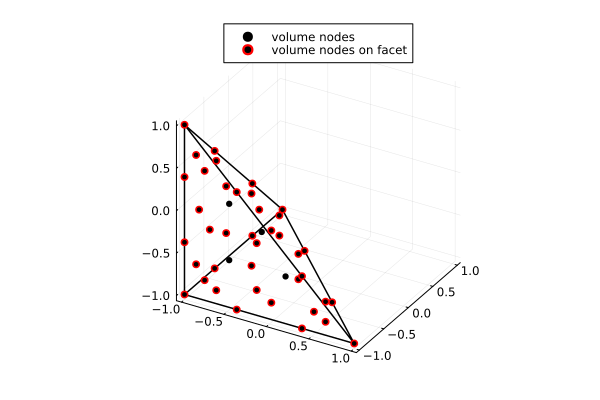

In [28]:
plot_tet_nodes(x=xyz)